In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("train.csv")

In [3]:
#Display the first few rows of the dataset

print("Sample of the dataset:\n\n", data.head())

Sample of the dataset:

    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region    

In [4]:
# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

/Users/aditya/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/aditya/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/aditya/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/aditya/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/Y

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:

# Calculate monthly sales for each department
data['month'] = data['Order Date'].dt.month
monthly_sales_by_department = data.groupby(['month', 'Category'])['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

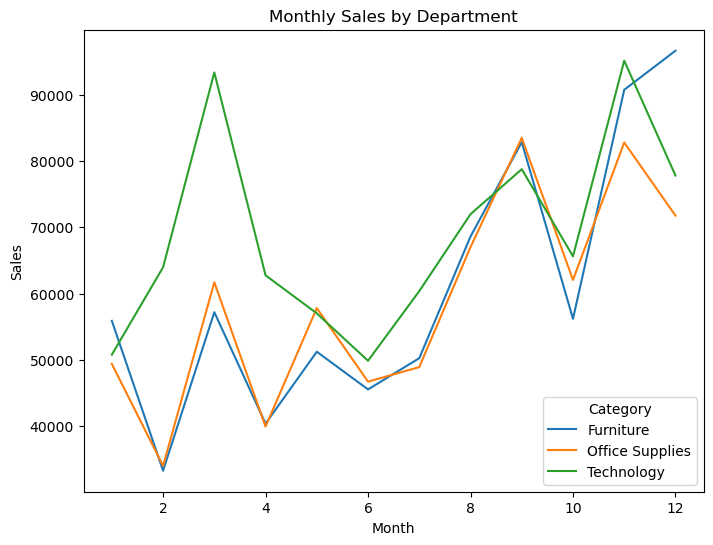

In [7]:
# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Monthly Sales by Department
sns.lineplot(x='month', y='Sales', hue='Category', data=monthly_sales_by_department, ax=axes)
axes.set_title('Monthly Sales by Department')
axes.set_xlabel('Month')
axes.set_ylabel('Sales')

In [8]:
# Calculate total sales by product and find top selling products
product_sales = data.groupby('Product Name')['Sales'].sum().reset_index()
top_selling_products = product_sales.nlargest(10, 'Sales')

Text(0, 0.5, 'Department')

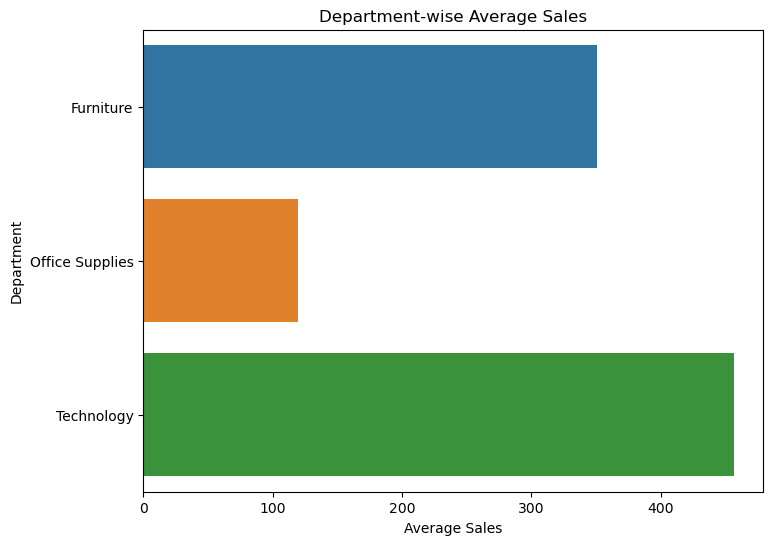

In [9]:
# Create subplots
fig, axes = plt.subplots(1,1,  figsize=(8, 6))
# Department-wise Average Sales
department_avg_sales = data.groupby('Category')['Sales'].mean().reset_index()
sns.barplot(x='Sales', y='Category', data=department_avg_sales, ax=axes)
axes.set_title('Department-wise Average Sales')
axes.set_xlabel('Average Sales')
axes.set_ylabel('Department')

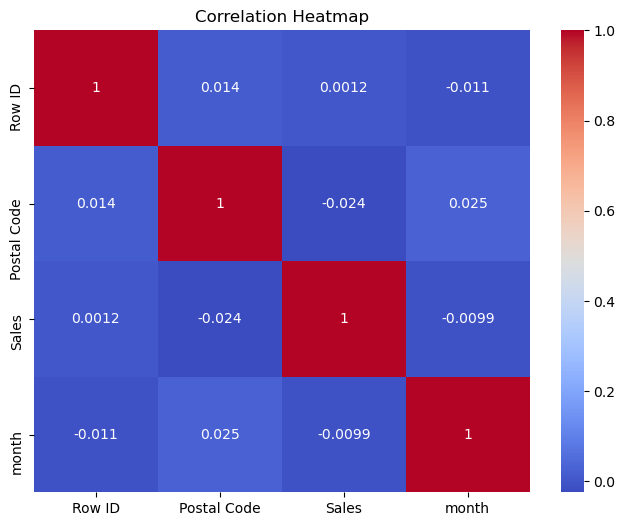

In [10]:
# Create subplots
fig, axes = plt.subplots(1,1,  figsize=(8, 6))
# Correlation Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes)
axes.set_title('Correlation Heatmap')
plt.show()

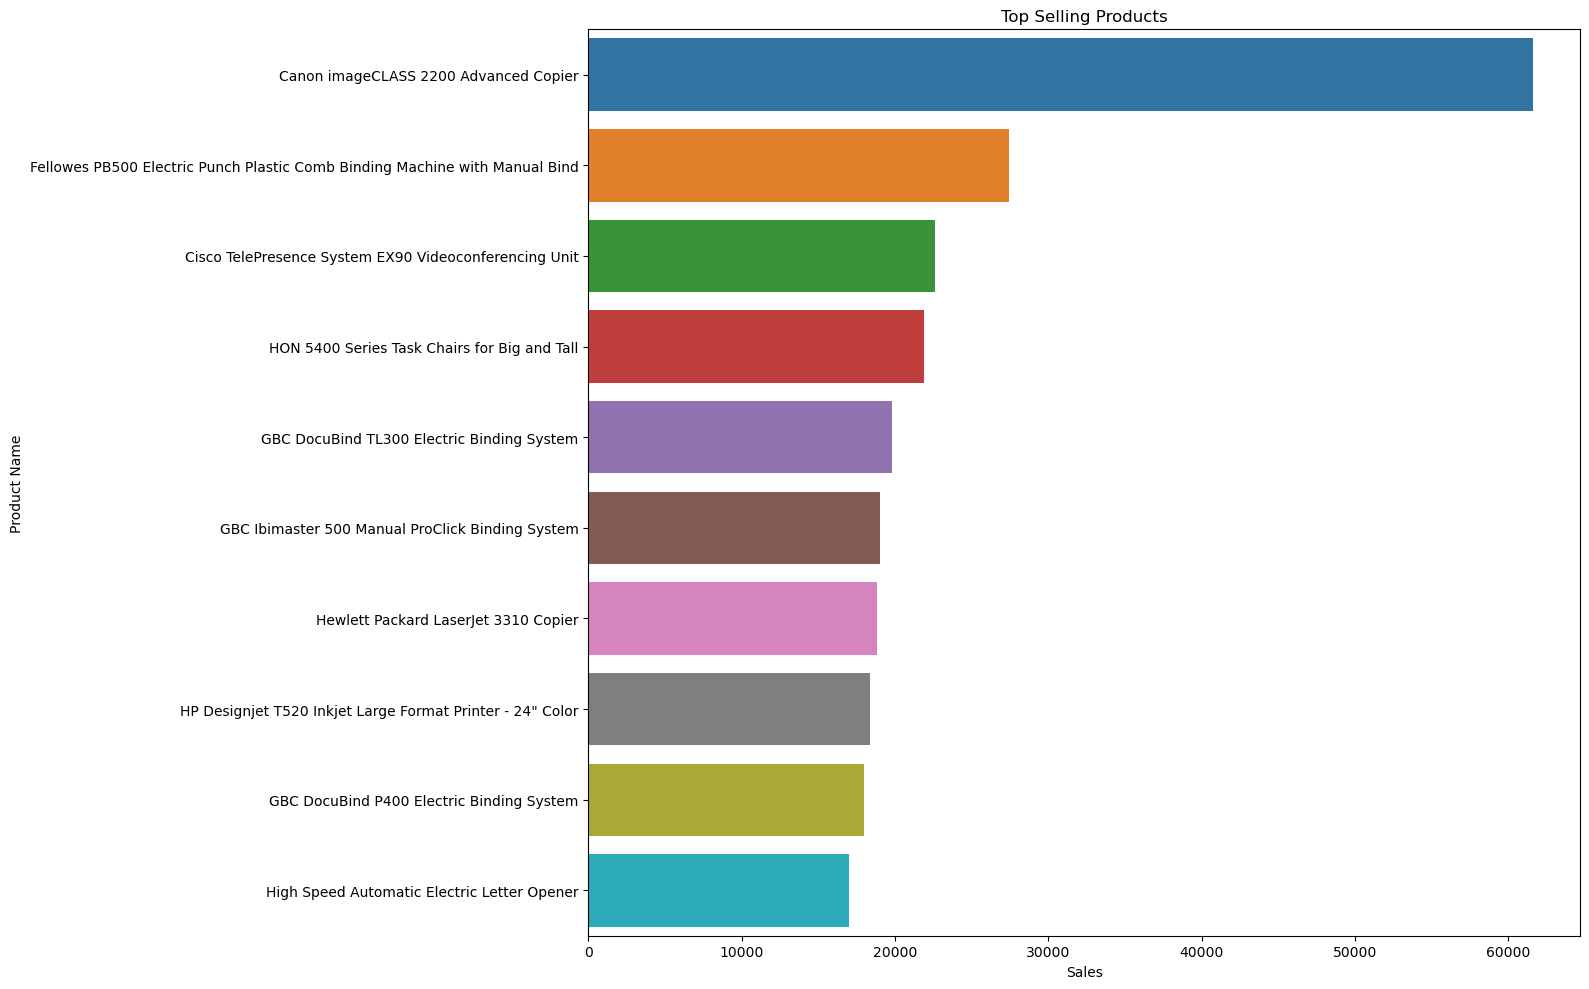

In [11]:
# Top Selling Products
fig, axes = plt.subplots(1,1,  figsize=(16, 10))
sns.barplot(x='Sales', y='Product Name', data=top_selling_products, ax=axes)
axes.set_title('Top Selling Products')
axes.set_xlabel('Sales')
axes.set_ylabel('Product Name')

plt.tight_layout()
plt.show()
